In [1]:
import sys
sys.path.append('..')
%matplotlib inline

#Influence of Synonymy and Homonymy

In [2]:
from lib import ngdb
import numpy as np
import seaborn as sns

In [3]:
db=ngdb.NamingGamesDB("graph5.db")

In [4]:
nb_iter = 4
values = [
    {'strat_type':'naive'},
    {'strat_type':'naive_real'},
    {'strat_type':'success_threshold'},
    {'strat_type':'success_threshold_real'}
    ]
Tmax = 10000

In [5]:
xp_base_cfg = {
    'pop_cfg':{
        'voc_cfg':{
            'voc_type':'sparse_matrix',
            'M':20,
            'W':20
            },
        'strat_cfg':{},
        'nbagent':20
        },
    'step':Tmax/100
    }

def xp_cfg(strat_cfg):
    xp_base_cfg['pop_cfg']['strat_cfg']= strat_cfg
    return xp_base_cfg

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)
/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


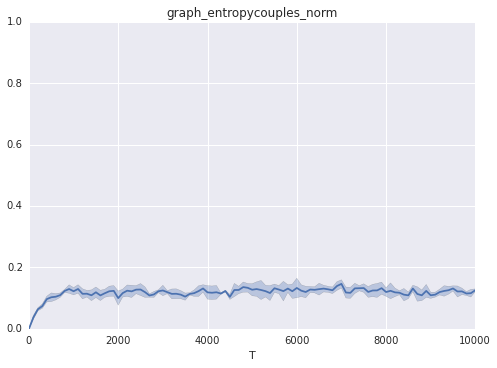

In [6]:
def graph_iter(strat_cfg):
    graph_list = []
    uuid_list = []
    for i in range(nb_iter):
        exp = db.get_experiment(blacklist=uuid_list, **xp_cfg(strat_cfg))
        exp.continue_exp_until(Tmax)
        uuid_list.append(exp.uuid)
        graph_list.append(exp.graph('entropycouples_norm', tmax=Tmax))
    graph=graph_list[0]
    for i in range(1, nb_iter):
        graph.add_graph(graph_list[i])
    graph.merge()
    return graph

graph=graph_iter(values[0])
graph.show()

In [7]:
for i in range(1,len(values)):
    graph.add_graph(graph_iter(values[i]))

tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
tried to get new w but all are known
t

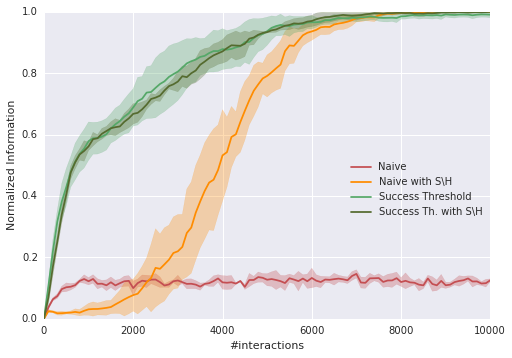

In [11]:
graph.title = ''
graph.xlabel = '#interactions'
graph.ylabel = 'Normalized Information'

replace = {
    'naive':'Naive',
    'naive_real':'Naive with S\\H',
    'success_threshold':'Success Threshold',
    'success_threshold_real':'Success Th. with S\\H'
    }

for i in range(len(graph.Yoptions)):
    graph.Yoptions[i] = {'label':'{}'.format(replace[values[i]['strat_type']])}
    
graph.Yoptions[0]['color'] = sns.color_palette()[2]
graph.Yoptions[1]['color'] = 'darkorange'
graph.Yoptions[2]['color'] = sns.color_palette()[1]
graph.Yoptions[3]['color'] = 'darkolivegreen'
    
graph.legendoptions['bbox_to_anchor'] = (0,0,1,0.54)

graph.show()